# Integrate-and-Fire ($\textit{N}$ neurons)

Install required packages:

In [108]:
import numpy as np
import pylab as pl
import random

Choose network size:

In [134]:
N = 2

Initialize parameters:

In [135]:
# timesteps
dt = 0.01 
iterations = 100
x = np.arange(0, iterations) * dt

# mebrane resistance
R = 1 

# membrane time constant
tau_m = 0.04

# external input (mA)
I = 20

# starting potential (mV)
V0 = np.zeros((N, 1))

# resting potential (mV)
V_rest = -70

# reset
reset = -80

# threshold
T = -63

# constants
delta = 0.1
gamma = np.ones((N, 1)) * 0.4

# array containing voltages 
voltages = np.zeros((N, iterations))

# array containing spike times
spikes = np.ones((N, iterations)) * -100

# array containing current
I_t = np.ones(iterations) * I

# array containing current estimate
Ihat_t = np.zeros(iterations)

# o(t)
o_t = np.zeros((N, iterations))

Run simulation:

In [136]:
for i in range(1, iterations):

    # update current estimate
    dIdt = - Ihat_t[i - 1] + np.sum(gamma * o_t[:, i - 1])
    Ihat_t[i] = Ihat_t[i - 1] + dt * dIdt
    
    # update voltage
    dVdt = (-(voltages[:, i - 1] - V_rest) + R * I) / tau_m
    voltages[:, i] = voltages[:, i - 1] + dt * dVdt
     
    # reset voltage when one of the neurons reaches threshold
    r = list(range(N))
    random.shuffle(r)
    
    for n in r:
        if voltages[n][i] > T:

            # update voltage 
            voltages[:, i] = reset
            spikes[n][i] = -90

            # update o(t)
            o_t[n][i] = 1 / dt
            
            break


Plot results:

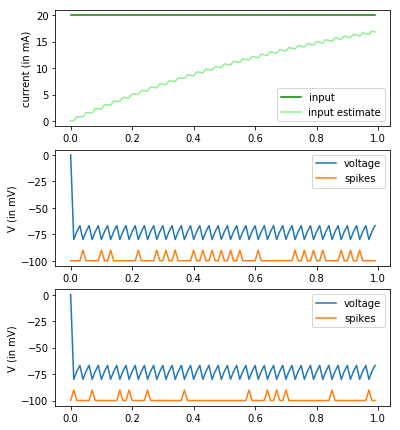

In [137]:
# total number of plots
plots = N + 1

# plot input and input estimate
pl.subplot(plots, 1, 1)
pl.plot(x, I_t, color='green',label='input')
pl.plot(x, Ihat_t, color='lightgreen',label='input estimate')
pl.legend()
pl.ylabel('current (in mA)')

# plot voltage and spike times per neuron
for i in range(N):
    pl.subplot(plots, 1, 2 + i)
    pl.plot(x, voltages[i],label='voltage')
    pl.plot(x, spikes[i],label='spikes')
    pl.legend()
    pl.ylabel('V (in mV)')

# adjust space between subplots
pl.subplots_adjust(top=1.5)